## 1. Stock Price App

In [8]:
#Importing Packages
import yfinance as yf
import streamlit as st
import pandas as pd
from datetime import datetime

In [9]:
#Header of the App
st.write("""
#Simple Stock Price App

Shown are the stock closing price and volume of Google!

    
""")

#getting the data from yfinance
tickersymbol = 'GOOGL'

#Get the data on this ticker symbol
tickerData = yf.Ticker(tickersymbol)

# Getting the historical prices for this ticker
current_date = datetime.now().date()
tickerDf = tickerData.history(period = '1d', start = '2010-5-31', end = current_date)

st.line_chart(tickerDf.Close)
st.line_chart(tickerDf.Volume)

2024-06-06 12:54:14.620 
  command:

    streamlit run c:\Users\USER\anaconda3\envs\Updated_Python_Dev_ALX\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [6]:
from datetime import datetime
datetime.now().date()

datetime.date(2024, 6, 6)

In [7]:
from datetime import datetime

# Get the current date
current_date = datetime.now().date()
print(current_date)


2024-06-06


In [10]:
#getting the data from yfinance
tickersymbol = 'GOOGL'

#Get the data on this ticker symbol
tickerData = yf.Ticker(tickersymbol)

# Getting the historical prices for this ticker
current_date = datetime.now().date()
tickerDf = tickerData.history(period = '1d', start = '2010-5-31', end = current_date)

In [12]:
tickerDf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-30 00:00:00-04:00,175.199997,175.220001,171.789993,172.110001,22958700,0.0,0.0
2024-05-31 00:00:00-04:00,171.860001,173.059998,169.440002,172.500000,37638900,0.0,0.0
2024-06-03 00:00:00-04:00,172.539993,174.529999,171.160004,173.169998,27459100,0.0,0.0
2024-06-04 00:00:00-04:00,173.279999,173.850006,171.889999,173.789993,26879600,0.0,0.0
2024-06-05 00:00:00-04:00,175.199997,176.649994,173.929993,175.410004,20329100,0.0,0.0


In [14]:
yf.Tickers()

TypeError: Tickers.__init__() missing 1 required positional argument: 'tickers'

In [15]:
help(yf)

Help on package yfinance:

NAME
    yfinance

DESCRIPTION
    # -*- coding: utf-8 -*-
    #
    # yfinance - market data downloader
    # https://github.com/ranaroussi/yfinance
    #
    # Copyright 2017-2019 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    #

PACKAGE CONTENTS
    base
    cache
    const
    data
    exceptions
    multi
    scrapers (package)
    shared
    ticker
    tickers
    utils
    version

CLASSES
    builti

In [26]:
#Loading the Symbols Data
df_url = 'https://raw.githubusercontent.com/JackronyK/Projects_Jackrony/main/Python%20Apps/Simple%20Stock%20Price/Data/Stock%20Market%20Data.csv'
cols_ = ['Symbol', 'Name', 'Country', 'Sector', 'Industry']
symbols_df = pd.read_csv(df_url)[cols_]

# The App
#Header of the App
st.write("""
## Stock Analytics App

Select Filter to view Stock analystics             
""")

#Sidebar Filters
country_filter = st.sidebar.selectbox('Select Country', sorted(symbols_df['Country'].unique()))
sector_filter = st.sidebar.selectbox('Select Sector', sorted(symbols_df['Sector'].unique()))
industry_filter = st.sidebar.selectbox('Select Industry', sorted(symbols_df['Industry'].unique()))

#Filtering the symbol df based on the user selection
filtered_df = symbols_df[
    (symbols_df['Country'] ==country_filter) &
    (symbols_df['Sector'] == sector_filter) &
    (symbols_df['Industry'] == industry_filter) 
]

# Displaying company Names
if not filtered_df.empty:
    st.write(f'## Companies in {country_filter}, {sector_filter}, {industry_filter}')
    selected_company = st.selectbox('Select a company: ', filtered_df['Name'].unique())

    #getting the symbol for the selected company
    selected_symbol = filtered_df[filtered_df['Name'] == selected_company]['Symbol'][0]

    #Fetch the data using yahoo-finance
    tickerData = yf.Ticker(selected_symbol)
    current_date = datetime.now().date()
    tickerDf = tickerData.history(period = '1d', start = '2010-5-31', end = current_date)

    #Displaying the Closing Price and Volume Chats
    st.write("""

    ###Closing Price

    """)
    st.line_chart(tickerDf.Close)

    st.write("""

    ### Volume

    """)
    st.line_chart(tickerDf.Volume)
else:
    st.write('No Companies mathc the selected filters')

In [39]:

symbols_df.Country.unique()
symbols_df.dropna().info()


<class 'pandas.core.frame.DataFrame'>
Index: 3930 entries, 0 to 4044
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Symbol    3930 non-null   object
 1   Name      3930 non-null   object
 2   Country   3930 non-null   object
 3   Sector    3930 non-null   object
 4   Industry  3930 non-null   object
dtypes: object(5)
memory usage: 184.2+ KB


In [40]:
import plotly as p

## 2. BioMetrics App

In [10]:
####################
# Import packages
####################
import pandas as pd
import streamlit as st
import requests
from io import BytesIO
from PIL import Image


####################
# Page Title
####################

Image_url = 'https://raw.githubusercontent.com/JackronyK/Projects_Jackrony/main/Python%20Apps/Biometrics%20App/dna-logo.jpg'
response = requests.get(Image_url)
image = Image.open(BytesIO(response.content))

st.write("""
# DNA Nucleatide Count Web App
         

This App counts the nuclatide composition od query DNA!

***
""")

####################
# Input Text Box
####################

st.header('Enter DNA sequence')

sequence_input = ">DNA Query 2\nGAACACGTGGAGGCAAACAGGAAGGTGAAGAAGAACTTATCCTATCAGGACGGAAGGTCCTGTGCTCGGG\nATCTTCCAGACGTCGCGACTCTAAATTGCCCCCTCTGAGGTCAAGGAACACAAGATGGTTTTGGAAATGC\nTGAACCCGATACATTATAACATCACCAGCATCGTGCCTGAAGCCATGCCTGCTGCCACCATGCCAGTCCT"

sequence = st.text_area("Sequence Input", sequence_input, height= 25)
sequence = sequence.splitlines()[1:]
sequence = ''.join(sequence)

st.write("""
***
""")
##Print the input DNA Sequence
st.header('INPUT (DNA Query)')
sequence

##DNA Nucleotide count
st.header()


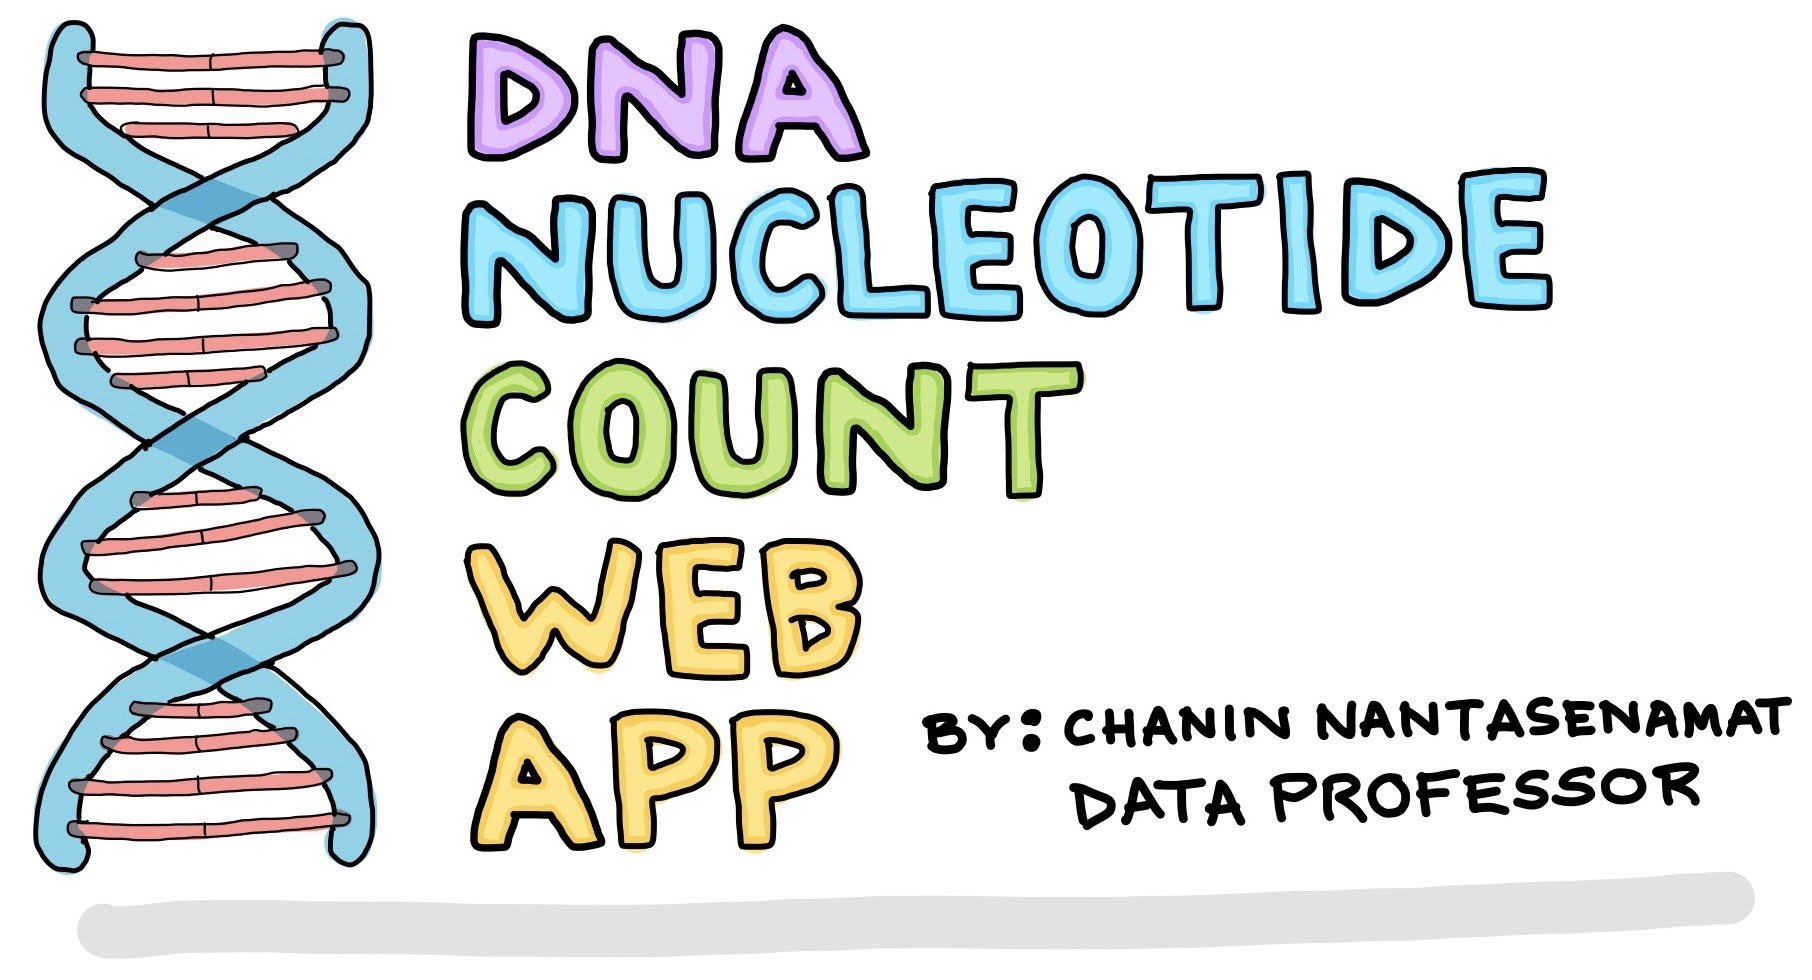

In [11]:
image